Training dataset heart using gradient descent method for testing and compare purpose <br>
Dataset source: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [117]:
# Import libraries
import pandas as pd
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [118]:
# Load dataset
df = pd.read_csv('heart.csv')
df.rename(columns={'output': 'hearth_attack_chance'}, inplace=True)

x = df.drop('hearth_attack_chance', axis=1)
y = df['hearth_attack_chance']


In [119]:
# Split data to train and test
RANDOM_SEED = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=RANDOM_SEED)

print('Dataset size')
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

Dataset size
x_train: (212, 13)
y_train: (212,)
x_test: (91, 13)
y_test: (91,)


In [120]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [121]:
# Create neural network model

model = Sequential([
    Dense(10, input_shape=(13,), activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                140       
                                                                 
 dense_39 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Train model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=20,
    verbose=0
)

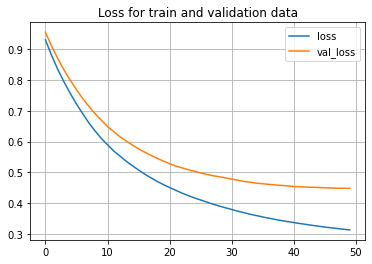

In [123]:
plt.title('Loss for train and validation data')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

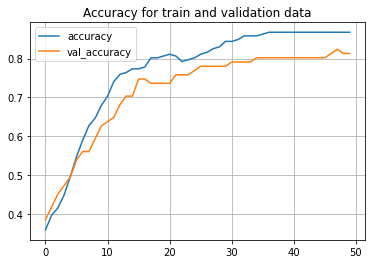

In [124]:
plt.title('Accuracy for train and validation data')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.show()